In [69]:
import pandas as pd
import numpy as np

#Reports
from ydata_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class
import sweetviz as sv
import phik
import shap

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Class
import keras
from keras import layers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf

<b>Data Frame</b>

In [27]:
df = pd.read_csv("clean_Almond.csv")
df.head()


,Length,Width,Thickness,Area,Perimeter,Roundness,Solidity,Compactness,Aspect_Ratio,Eccentricity,Extent,Convex_Area,Type
0,272.553253,227.940628,127.759132,22619.0,643.813269,0.460467,0.973384,1.458265,1.565795,0.798147,0.681193,23237.5,MAMRA
1,340.942719,234.188126,128.199509,23038.0,680.984841,0.451983,0.957304,1.601844,1.552992,0.755233,0.656353,24065.5,MAMRA
2,344.597992,229.418610,125.796547,22386.5,646.943212,0.178304,0.967270,1.487772,1.696236,0.845151,0.683620,23144.0,MAMRA
3,367.850677,232.763153,125.918808,22578.5,661.227483,0.547965,0.965512,1.540979,1.942538,0.806122,0.685360,23385.0,MAMRA
4,276.140106,230.150742,107.253448,19068.0,624.842706,0.430272,0.951450,1.629395,2.142503,0.844623,0.714800,20041.0,MAMRA


<b>Y Data</b>

In [28]:
report = ProfileReport(df, title='Almond Data')
report.to_file("ydata_Almond.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<b>AutoViz</b>

In [29]:
AV = AutoViz_Class()
reg_av=report = AV.AutoViz("clean_Almond.csv")

Shape of your Data Set loaded: (2803, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    13 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variab

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Length,float64,0.000000,NA,151.335266,515.352478,Column has 21 outliers greater than upper bound (455.34) or lower than lower bound(118.84). Cap them or remove them.
Width,float64,0.000000,NA,88.050529,258.569794,Column has 9 outliers greater than upper bound (252.22) or lower than lower bound(88.01). Cap them or remove them.
Thickness,float64,0.000000,NA,59.494278,181.845200,Column has 33 outliers greater than upper bound (157.97) or lower than lower bound(60.98). Cap them or remove them.
Area,float64,0.000000,NA,6037.000000,89282.000000,Column has 87 outliers greater than upper bound (59310.25) or lower than lower bound(-9647.75). Cap them or remove them.
Perimeter,float64,0.000000,NA,311.563489,1864.947387,Column has 61 outliers greater than upper bound (1339.65) or lower than lower bound(110.98). Cap them or remove them.
Roundness,float64,0.000000,NA,0.173748,0.697293,No issue
Solidity,float64,0.000000,NA,0.718772,0.992889,Column has 208 outliers greater than upper bound (1.04) or lower than lower bound(0.89). Cap them or remove them.
Compactness,float64,0.000000,NA,1.164469,9.660057,"Column has 209 outliers greater than upper bound (2.88) or lower than lower bound(0.44). Cap them or remove them., Column has a high correlation with ['Solidity']. Consider dropping one of them."
Aspect_Ratio,float64,0.000000,NA,1.400082,2.731251,Column has 130 outliers greater than upper bound (2.17) or lower than lower bound(1.28). Cap them or remove them.
Eccentricity,float64,0.000000,NA,0.699897,0.930563,Column has 11 outliers greater than upper bound (0.92) or lower than lower bound(0.70). Cap them or remove them.


Number of All Scatter Plots = 78
All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [77]:
report = AV.AutoViz("Clean_Almond.csv", chart_format="bokeh", depVar="Type")

Shape of your Data Set loaded: (2803, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    12 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################


BokehModel(combine_events=True, render_bundle={'docs_json': {'62816965-af86-4492-9b17-752876fada0f': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'d8235dc2-c4da-4439-a564-71cef03bb5dd': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'533ad3cf-e17a-4797-a57c-653a15755af1': {'version…

KDE plot is erroring due to problems with DynamicMaps. Hence it is skipped


BokehModel(combine_events=True, render_bundle={'docs_json': {'945e3531-08cb-4965-a0f5-9fad57e38e48': {'version…

No date vars could be found in data set


BokehModel(combine_events=True, render_bundle={'docs_json': {'dd29f8e5-1ae5-46ef-bfac-0ec82561edfa': {'version…

Time to run AutoViz (in seconds) = 4


<b>SweetViz</b>

In [31]:
report=sv.analyze(df)
report.show_html('sv_Almond.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sv_Almond.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<b>Phik-Matrix</b>

In [32]:
# compute phik-matrix values
phik_matrix = df.phik_matrix()

phik_matrix

interval columns not set, guessing: ['Length', 'Width', 'Thickness', 'Area', 'Perimeter', 'Roundness', 'Solidity', 'Compactness', 'Aspect_Ratio', 'Eccentricity', 'Extent', 'Convex_Area']


,Length,Width,Thickness,Area,Perimeter,Roundness,Solidity,Compactness,Aspect_Ratio,Eccentricity,Extent,Convex_Area,Type
Length,1.000000,0.468891,0.328809,0.739572,0.693808,0.449980,0.122181,0.199238,0.410369,0.358817,0.307387,0.764973,0.381952
Width,0.468891,1.000000,0.291190,0.694956,0.486105,0.197349,0.183906,0.079758,0.207034,0.253578,0.203556,0.684468,0.284169
Thickness,0.328809,0.291190,1.000000,0.460928,0.378158,0.256051,0.049681,0.072787,0.000000,0.000000,0.304876,0.467003,0.278852
Area,0.739572,0.694956,0.460928,1.000000,0.842406,0.376436,0.161451,0.103239,0.250619,0.256171,0.374556,0.994625,0.287699
Perimeter,0.693808,0.486105,0.378158,0.842406,1.000000,0.255076,0.500722,0.568092,0.218634,0.200555,0.338876,0.856967,0.305267
Roundness,0.449980,0.197349,0.256051,0.376436,0.255076,1.000000,0.358773,0.304266,0.647335,0.620591,0.476434,0.387019,0.471345
Solidity,0.122181,0.183906,0.049681,0.161451,0.500722,0.358773,1.000000,0.749895,0.119626,0.074289,0.805820,0.147624,0.364287
Compactness,0.199238,0.079758,0.072787,0.103239,0.568092,0.304266,0.749895,1.000000,0.000000,0.036404,0.540934,0.119866,0.419827
Aspect_Ratio,0.410369,0.207034,0.000000,0.250619,0.218634,0.647335,0.119626,0.000000,1.000000,0.623176,0.322711,0.287956,0.289514
Eccentricity,0.358817,0.253578,0.000000,0.256171,0.200555,0.620591,0.074289,0.036404,0.623176,1.000000,0.340817,0.276927,0.265909


<b>Data Prep</b>
<p> is done in Python 3.9 you can see the report in the html folder</p>

<h3>X/Y Tets</h3>

<b>X</b>

In [70]:
# everything else except the target variable
X = df.drop(["Type"], axis=1)

<b>Y Classification</b>

In [71]:
# have only the target variable here (dependent variable)
y_temp = df['Type']

# since we are doing classification, we have to process our target values with an encoder
# and convert them into a categorical TensorFlow/Keras -format 
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y_enc)

<b>Shap</b>

In [48]:
%matplotlib inline

In [75]:
# Could not use shap, 
# Error: ValueError: Per-column arrays must each be 1-dimensional
# AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.
data=df
le = LabelEncoder()
data['Type_encoded'] = le.fit_transform(data['Type'])
data=data.drop(['Type'],axis=1)

X = data.drop(columns='Type_encoded')
y = data['Type_encoded']
data


,Length,Width,Thickness,Area,Perimeter,Roundness,Solidity,Compactness,Aspect_Ratio,Eccentricity,Extent,Convex_Area,Type_encoded
0,272.553253,227.940628,127.759132,22619.0,643.813269,0.460467,0.973384,1.458265,1.565795,0.798147,0.681193,23237.5,0
1,340.942719,234.188126,128.199509,23038.0,680.984841,0.451983,0.957304,1.601844,1.552992,0.755233,0.656353,24065.5,0
2,344.597992,229.418610,125.796547,22386.5,646.943212,0.178304,0.967270,1.487772,1.696236,0.845151,0.683620,23144.0,0
3,367.850677,232.763153,125.918808,22578.5,661.227483,0.547965,0.965512,1.540979,1.942538,0.806122,0.685360,23385.0,0
4,276.140106,230.150742,107.253448,19068.0,624.842706,0.430272,0.951450,1.629395,2.142503,0.844623,0.714800,20041.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,244.866592,192.709366,122.356506,18471.5,653.345233,0.456914,0.931000,1.838965,1.812843,0.762105,0.725739,19840.5,2
2799,366.171509,186.254745,118.708961,17213.5,581.688379,0.642495,0.952706,1.564234,1.705885,0.810162,0.714016,18068.0,2
2800,408.806732,186.196182,119.147224,17510.5,608.315795,0.558189,0.948821,1.681705,1.668084,0.822138,0.718999,18455.0,2
2801,280.646667,188.660828,120.634438,17941.0,630.759446,0.386465,0.944810,1.764701,1.705924,0.797262,0.738191,18989.0,2


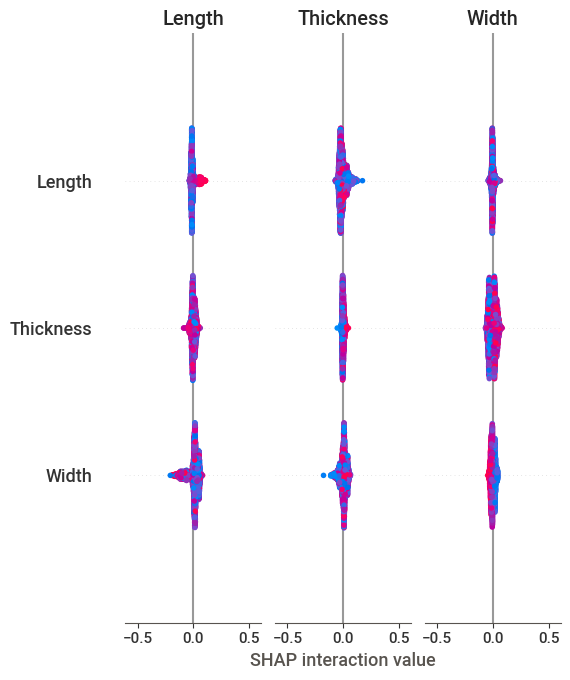

ValueError: Per-column arrays must each be 1-dimensional

In [64]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=0)

# Train a classification model
model = RandomForestClassifier()
model.fit(X_train, y_train)



explainer = shap.TreeExplainer(model)
# SHAP values for multi-class classification return a list of shap_values, one for each class
shap_values = explainer.shap_values(X)




# Plot SHAP summary
shap.summary_plot(shap_values, X, feature_names=X.columns)


importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.mean(np.abs(shap_values), axis=0)
})
print("Feature Importances using SHAP:")
print(importance)

<b>Fisher</b>

<Axes: >

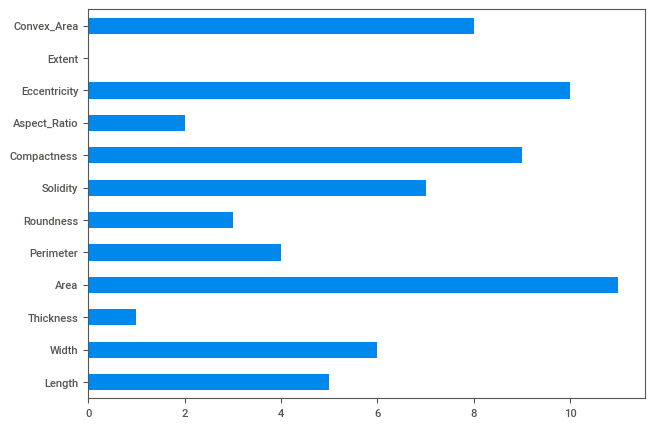

In [76]:
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')